In [83]:
import os
import re
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from datasets_utils import ds_load
from sklearn.manifold import TSNE

In [84]:
DATASETS_PATH = Path('datasets')

In [4]:
ds_name = 'ArticularyWordRecognition'
train_ds, test_ds = ds_load(DATASETS_PATH, ds_name)

In [ ]:
tsne = TSNE(perplexity=30)
new_X = tsne.fit_transform(train_ds.X.reshape(train_ds.X.shape[0], -1))

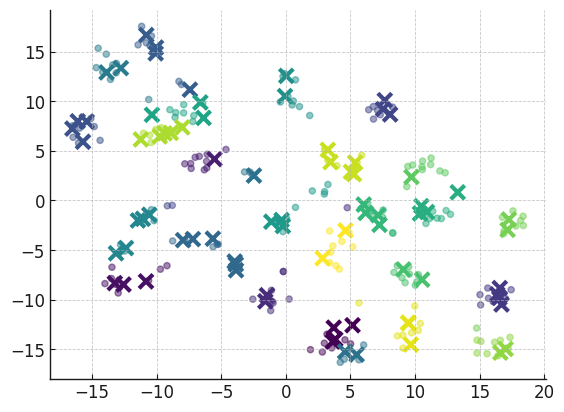

In [82]:
directory = f'experiments/{ds_name}TestExperiment/protos/epoch-200'
file_pattern = re.compile(r'prototype-ts-original\d+\.npy')

files = [os.path.join(directory, f) for f in os.listdir(directory) if file_pattern.match(f)]

protos = [np.load(file).transpose()[np.newaxis, ...] for file in files]
protos = np.unique(protos, axis=0)
protos = np.vstack(protos)

mask = np.isin(train_ds.X, protos).all(axis=(1, 2))

plt.scatter(new_X[~mask, 0], new_X[~mask, 1], c=train_ds.y[~mask], marker='o', alpha=0.5, s=20)
plt.scatter(new_X[mask, 0], new_X[mask, 1], c=train_ds.y[mask], marker='x', s=100, lw=3)

In [ ]:
scaler = StandardScaler()
scale_separately = False
X = train_ds.X # .transpose(0, 2, 1).reshape(-1, train_ds.X.shape[1])
plt.plot(X[1].transpose())
plt.show()
if scale_separately:
    tX = scaler.fit_transform(X.transpose(0, 2, 1).reshape(-1, X.shape[1])).reshape(-1, X.shape[2], X.shape[1]).transpose(0, 2, 1)
else:
    tX = scaler.fit_transform(X.reshape(-1, 1)).reshape(X.shape)
plt.plot(tX[1].transpose())
plt.show()

In [ ]:
scaler.scale_.shape

In [ ]:
# Example input data
x = np.random.randn(180, 2, 45)  # Replace with your actual data

# Reshape each example to a 1D vector of shape (90,)
x_flat = x.reshape(180, -1)  # Shape: (180, 90)

# Compute pairwise L2 distances
# Calculate the squared differences
x_squared = np.sum(np.square(x_flat), axis=1, keepdims=True)  # Shape: (180, 1)
squared_diff = x_squared + x_squared.T - 2 * np.dot(x_flat, x_flat.T)  # Pairwise distance matrix

# Take the square root to get L2 distances, ensure no negative due to precision errors
pairwise_distances = np.sqrt(np.maximum(squared_diff, 0))

# Find the maximum distance, ignoring self-pairs (diagonal)
np.fill_diagonal(pairwise_distances, 0)  # Set diagonal to 0 to ignore self-distances
max_distance = np.max(pairwise_distances)

print("Maximum pairwise distance:", max_distance)